# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [10]:
#pip install matplotlib
#pip install seaborn
#pip install scikit-learn


In [11]:
import pandas as pd
table = pd.read_csv("advertising.csv")
print(table)


        TV  Radio  Jornal  Vendas
0    230.1   37.8    69.2    22.1
1     44.5   39.3    45.1    10.4
2     17.2   45.9    69.3    12.0
3    151.5   41.3    58.5    16.5
4    180.8   10.8    58.4    17.9
..     ...    ...     ...     ...
195   38.2    3.7    13.8     7.6
196   94.2    4.9     8.1    14.0
197  177.0    9.3     6.4    14.8
198  283.6   42.0    66.2    25.5
199  232.1    8.6     8.7    18.4

[200 rows x 4 columns]


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


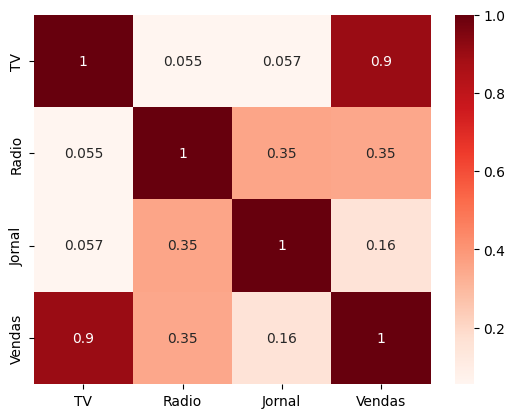

In [12]:
import matplotlib.pyplot as plt #para funcionar os gráficos do seaborn
import seaborn as sns
print(table.corr()) # corr() -> Correlação entre as colunas, quanto mais perto de 1 mais correlação terá


# Criar o gráfico
sns.heatmap(table.corr(), cmap = "Reds", annot = True)#annot para aparecer os números, cmap para colocar uma cor.
# Exibe o gráfico
plt.show()


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [13]:
x = table[["TV", "Radio", "Jornal"]]#Mais de uma coluna, bota outro colchete
y = table["Vendas"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)#train_test vai dividir 70% pra treino e 30% para teste
#test_size = x -> para colocar a porcentagem de teste
#random_state = 1 -> para ter um resultado imutável

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [15]:
# importar inteligência artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# criar a inteligência artificial
model_linearRegression = LinearRegression()
model_decisionTree = RandomForestRegressor()
# treinar a inteligência artificial
model_linearRegression.fit(x_train, y_train)
model_decisionTree.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [21]:
prevision_linearRegression = model_linearRegression.predict(x_test)
prevision_decisionTree = model_decisionTree.predict(x_test)

from sklearn.metrics import r2_score

print(r2_score(y_test, prevision_linearRegression))
print(r2_score(y_test, prevision_decisionTree))

0.8778951879946923
0.9397962527360021


#### Visualização Gráfica das Previsões

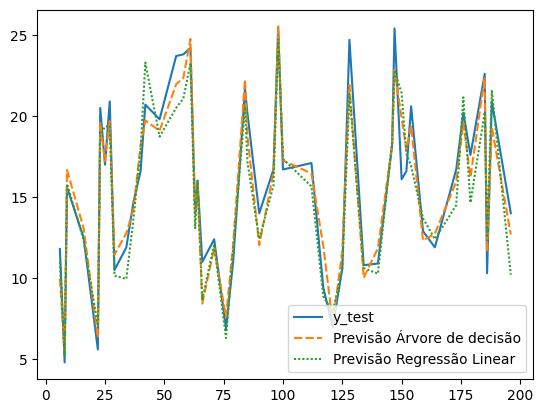

In [24]:
table_assistant = pd.DataFrame()
table_assistant["y_test"] = y_test
table_assistant["Previsão Árvore de decisão"] = prevision_decisionTree
table_assistant["Previsão Regressão Linear"] = prevision_linearRegression
#print(table_assistant)

sns.lineplot(data = table_assistant)
plt.show()

#### Como fazer uma nova previsão?

In [28]:
new_table = pd.read_csv("novos.csv")
print(new_table)
prevision = model_decisionTree.predict(new_table)
print(prevision)

      TV  Radio  Jornal
0   23.1    3.8    69.2
1   44.5    0.0     5.1
2  170.2   45.9     0.0
[ 7.721  8.528 19.393]
